In [2]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

In [3]:
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [12]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [13]:
arxiv.invoke("what is machine learning")

'Published: 2023-06-07\nTitle: Changing Data Sources in the Age of Machine Learning for Official Statistics\nAuthors: Cedric De Boom, Michael Reusens\nSummary: Data science has become increasingly essential for the production of official statistics, as it enables the automated collection, processing, and analysis of large amounts of data. With such data science practices in place, it enables more timely, more insightful and more flexible reporting. However, the quality and integrity of data-science-'

In [9]:
api_wrapper_arxiv=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_arxiv)
print(wiki.name)

wikipedia


In [11]:
wiki.invoke("what is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [14]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [16]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily=TavilySearchResults()

C:\Users\kumar\AppData\Local\Temp\ipykernel_23468\3543858584.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


In [17]:
tavily.invoke("who's prime is better jon jones or stipe miocic?")

[{'title': 'Prime Stipe vs Prime Jones : r/ufc - Reddit',
  'url': 'https://www.reddit.com/r/ufc/comments/15um7t5/prime_stipe_vs_prime_jones/',
  'content': 'Go to ufc   \n\nr/ufc   • \n\nCuriousWanderer567\n\n# Prime Stipe vs Prime Jones\n\nThey’re gonna fight already but Stipe is almost 41 (his birthday is tomorrow) and it’s kinda obvious Jon Jones will beat him being way younger. Who would win in both of their respective primes though?\n\n          \n\n## Top Posts\n\n Reddit\n\n  reReddit: Top posts of August 18, 2023\n\n Reddit\n\n  reReddit: Top posts of August 2023\n\n Reddit\n\n  reReddit: Top posts of 2023\n\nReddit Rules    Privacy Policy    User Agreement    Your Privacy Choices    Accessibility   Reddit, Inc. © 2026. All rights reserved.',
  'score': 0.83290404},
 {'title': 'UFC 309: Jones vs. Miocic',
  'url': 'http://ufcstats.com/fight-details/b35e47f2f58ef026',
  'content': '## UFC 309: Jones vs. Miocic\n\nW \n\n### Jon Jones\n\nL \n\n### Stipe Miocic\n\nUFC Heavyweight 

In [18]:
tools=[arxiv,wiki,tavily]

In [20]:
from langchain_groq.chat_models import ChatGroq

In [21]:
llm=ChatGroq(model="llama-3.1-8b-instant",temperature=0)

In [23]:
llm_with_tools=llm.bind_tools(tools)

In [24]:
from pprint import pprint
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage

In [26]:
llm_with_tools.invoke([HumanMessage(content=f"current best ai technology for freshers")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'mtc2kdqw5', 'function': {'arguments': '{"query":"current best AI technology for freshers"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 554, 'total_tokens': 574, 'completion_time': 0.033117143, 'completion_tokens_details': None, 'prompt_time': 0.039310809, 'prompt_tokens_details': None, 'queue_time': 0.048968714, 'total_time': 0.072427952}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c7077-6be9-7322-a520-c5a76d6acab0-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'current best AI technology for freshers'}, 'id': 'mtc2kdqw5', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 554, 'output_tokens': 20, 'total_tokens': 574})

In [27]:
from IPython.display import Image
from langgraph.graph import StateGraph,START,END

In [28]:
from langgraph.prebuilt import ToolNode,tools_condition

In [35]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class state(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

In [39]:
def tool_calling_llm(state:state):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

builder=StateGraph(state)
builder.add_node("tool calling llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"tool calling llm")
builder.add_conditional_edges("tool calling llm",tools_condition)
builder.add_edge("tool calling llm",END)

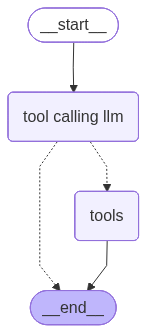

In [40]:
graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
messages=graph.invoke({'messages':[HumanMessage(content="1706.03762")]})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (rdtnb4cnj)
 Call ID: rdtnb4cnj
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base
